In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from prophet import Prophet

from tqdm import tqdm
import time

from multiprocessing import Pool, cpu_count

Function that generates random time-series between a time period

In [2]:
def rnd_timeserie(min_date, max_date):
    time_index = pd.date_range(min_date, max_date)
    dates = (pd.DataFrame({'ds': pd.to_datetime(time_index.values)},
                          index=range(len(time_index))))
    y = np.random.random_sample(len(dates))*10
    dates['y'] = y
    return dates

One of our random time-series looks like this:

In [3]:
xxx = rnd_timeserie('2018-01-01','2018-12-30')

<AxesSubplot: >

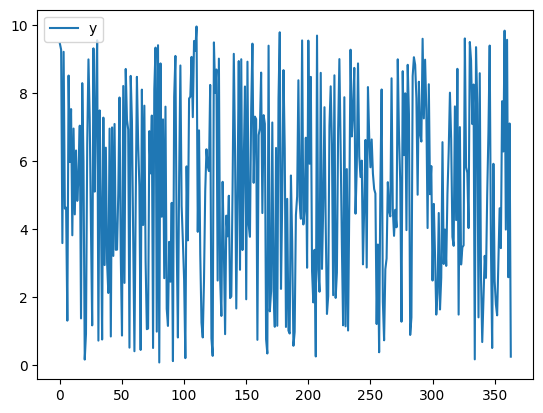

In [4]:
sns.lineplot(xxx)

Lets generate 500 series

In [5]:
series = [rnd_timeserie('2018-01-01','2018-12-30') for x in range(0,500)]

In [6]:
len(series)

500

In [13]:
series

[            ds         y
 0   2018-01-01  8.258394
 1   2018-01-02  3.933667
 2   2018-01-03  6.353917
 3   2018-01-04  7.298487
 4   2018-01-05  2.771775
 ..         ...       ...
 359 2018-12-26  4.902140
 360 2018-12-27  4.288587
 361 2018-12-28  0.234061
 362 2018-12-29  6.689234
 363 2018-12-30  1.699002
 
 [364 rows x 2 columns],
             ds         y
 0   2018-01-01  3.516171
 1   2018-01-02  1.776461
 2   2018-01-03  6.755089
 3   2018-01-04  2.413177
 4   2018-01-05  5.012754
 ..         ...       ...
 359 2018-12-26  7.871794
 360 2018-12-27  9.983535
 361 2018-12-28  6.051594
 362 2018-12-29  7.490529
 363 2018-12-30  8.072531
 
 [364 rows x 2 columns],
             ds         y
 0   2018-01-01  7.496138
 1   2018-01-02  2.479977
 2   2018-01-03  0.523360
 3   2018-01-04  8.830540
 4   2018-01-05  3.318341
 ..         ...       ...
 359 2018-12-26  9.931755
 360 2018-12-27  9.186894
 361 2018-12-28  8.886107
 362 2018-12-29  6.849637
 363 2018-12-30  6.449943
 
 [364 ro

Let’s create a simple Prophet model, for this we define a function called run_prophet that takes a time-series and fits a model with the data, then we can use that model to predict the next 90 days.

In [7]:
def run_prophet(timeserie):
    model = Prophet(yearly_seasonality=False,daily_seasonality=False)
    model.fit(timeserie)
    forecast = model.make_future_dataframe(periods=90, include_history=False)
    forecast = model.predict(forecast)
    return forecast

For example, we can run this function with the first generated time-serie.

We can see our forecasted results for that serie:

In [8]:
f = run_prophet(series[0])
f.head()

12:38:28 - cmdstanpy - INFO - Chain [1] start processing
12:38:28 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-31,4.364008,0.582914,7.747761,4.364008,4.364008,-0.391814,-0.391814,-0.391814,-0.391814,-0.391814,-0.391814,0.0,0.0,0.0,3.972193
1,2019-01-01,4.361656,0.377964,7.224693,4.361656,4.361656,-0.397698,-0.397698,-0.397698,-0.397698,-0.397698,-0.397698,0.0,0.0,0.0,3.963958
2,2019-01-02,4.359304,1.858539,8.740622,4.359304,4.359304,0.967143,0.967143,0.967143,0.967143,0.967143,0.967143,0.0,0.0,0.0,5.326447
3,2019-01-03,4.356952,0.042759,7.064601,4.356951,4.356955,-0.988792,-0.988792,-0.988792,-0.988792,-0.988792,-0.988792,0.0,0.0,0.0,3.368160
4,2019-01-04,4.354600,0.814943,8.111943,4.354597,4.354607,0.142597,0.142597,0.142597,0.142597,0.142597,0.142597,0.0,0.0,0.0,4.497198


Running 500 time-series.

In [9]:
start_time = time.time()
result = list(map(lambda timeserie: run_prophet(timeserie), tqdm(series)))
print("--- %s seconds ---" % (time.time() - start_time))

  0%|                                                   | 0/500 [00:00<?, ?it/s]12:38:30 - cmdstanpy - INFO - Chain [1] start processing
12:38:30 - cmdstanpy - INFO - Chain [1] done processing
  0%|                                           | 1/500 [00:00<01:34,  5.26it/s]12:38:30 - cmdstanpy - INFO - Chain [1] start processing
12:38:30 - cmdstanpy - INFO - Chain [1] done processing
  0%|▏                                          | 2/500 [00:00<01:52,  4.44it/s]12:38:31 - cmdstanpy - INFO - Chain [1] start processing
12:38:31 - cmdstanpy - INFO - Chain [1] done processing
  1%|▎                                          | 3/500 [00:00<01:45,  4.69it/s]12:38:31 - cmdstanpy - INFO - Chain [1] start processing
12:38:31 - cmdstanpy - INFO - Chain [1] done processing
  1%|▎                                          | 4/500 [00:00<01:55,  4.31it/s]12:38:31 - cmdstanpy - INFO - Chain [1] start processing
12:38:31 - cmdstanpy - INFO - Chain [1] done processing
  1%|▍                             

12:38:40 - cmdstanpy - INFO - Chain [1] done processing
  9%|███▌                                      | 43/500 [00:10<01:45,  4.34it/s]12:38:40 - cmdstanpy - INFO - Chain [1] start processing
12:38:40 - cmdstanpy - INFO - Chain [1] done processing
  9%|███▋                                      | 44/500 [00:10<01:48,  4.20it/s]12:38:41 - cmdstanpy - INFO - Chain [1] start processing
12:38:41 - cmdstanpy - INFO - Chain [1] done processing
  9%|███▊                                      | 45/500 [00:10<01:43,  4.38it/s]12:38:41 - cmdstanpy - INFO - Chain [1] start processing
12:38:41 - cmdstanpy - INFO - Chain [1] done processing
  9%|███▊                                      | 46/500 [00:10<01:48,  4.17it/s]12:38:41 - cmdstanpy - INFO - Chain [1] start processing
12:38:41 - cmdstanpy - INFO - Chain [1] done processing
  9%|███▉                                      | 47/500 [00:11<01:53,  3.99it/s]12:38:41 - cmdstanpy - INFO - Chain [1] start processing
12:38:41 - cmdstanpy - INFO - Chain

 17%|███████▏                                  | 85/500 [00:19<01:35,  4.35it/s]12:38:50 - cmdstanpy - INFO - Chain [1] start processing
12:38:50 - cmdstanpy - INFO - Chain [1] done processing
 17%|███████▏                                  | 86/500 [00:20<01:40,  4.13it/s]12:38:50 - cmdstanpy - INFO - Chain [1] start processing
12:38:50 - cmdstanpy - INFO - Chain [1] done processing
 17%|███████▎                                  | 87/500 [00:20<01:35,  4.32it/s]12:38:51 - cmdstanpy - INFO - Chain [1] start processing
12:38:51 - cmdstanpy - INFO - Chain [1] done processing
 18%|███████▍                                  | 88/500 [00:20<01:40,  4.08it/s]12:38:51 - cmdstanpy - INFO - Chain [1] start processing
12:38:51 - cmdstanpy - INFO - Chain [1] done processing
 18%|███████▍                                  | 89/500 [00:20<01:35,  4.32it/s]12:38:51 - cmdstanpy - INFO - Chain [1] start processing
12:38:51 - cmdstanpy - INFO - Chain [1] done processing
 18%|███████▌                      

12:39:00 - cmdstanpy - INFO - Chain [1] done processing
 26%|██████████▍                              | 128/500 [00:30<01:30,  4.11it/s]12:39:00 - cmdstanpy - INFO - Chain [1] start processing
12:39:00 - cmdstanpy - INFO - Chain [1] done processing
 26%|██████████▌                              | 129/500 [00:30<01:25,  4.33it/s]12:39:01 - cmdstanpy - INFO - Chain [1] start processing
12:39:01 - cmdstanpy - INFO - Chain [1] done processing
 26%|██████████▋                              | 130/500 [00:30<01:29,  4.13it/s]12:39:01 - cmdstanpy - INFO - Chain [1] start processing
12:39:01 - cmdstanpy - INFO - Chain [1] done processing
 26%|██████████▋                              | 131/500 [00:30<01:33,  3.95it/s]12:39:01 - cmdstanpy - INFO - Chain [1] start processing
12:39:01 - cmdstanpy - INFO - Chain [1] done processing
 26%|██████████▊                              | 132/500 [00:31<01:27,  4.20it/s]12:39:01 - cmdstanpy - INFO - Chain [1] start processing
12:39:01 - cmdstanpy - INFO - Chain

 34%|█████████████▉                           | 170/500 [00:40<01:23,  3.97it/s]12:39:11 - cmdstanpy - INFO - Chain [1] start processing
12:39:11 - cmdstanpy - INFO - Chain [1] done processing
 34%|██████████████                           | 171/500 [00:40<01:18,  4.22it/s]12:39:11 - cmdstanpy - INFO - Chain [1] start processing
12:39:11 - cmdstanpy - INFO - Chain [1] done processing
 34%|██████████████                           | 172/500 [00:40<01:21,  4.01it/s]12:39:11 - cmdstanpy - INFO - Chain [1] start processing
12:39:11 - cmdstanpy - INFO - Chain [1] done processing
 35%|██████████████▏                          | 173/500 [00:41<01:17,  4.21it/s]12:39:12 - cmdstanpy - INFO - Chain [1] start processing
12:39:12 - cmdstanpy - INFO - Chain [1] done processing
 35%|██████████████▎                          | 174/500 [00:41<01:20,  4.03it/s]12:39:12 - cmdstanpy - INFO - Chain [1] start processing
12:39:12 - cmdstanpy - INFO - Chain [1] done processing
 35%|██████████████▎               

12:39:21 - cmdstanpy - INFO - Chain [1] done processing
 43%|█████████████████▍                       | 213/500 [00:51<01:08,  4.20it/s]12:39:21 - cmdstanpy - INFO - Chain [1] start processing
12:39:21 - cmdstanpy - INFO - Chain [1] done processing
 43%|█████████████████▌                       | 214/500 [00:51<01:10,  4.03it/s]12:39:22 - cmdstanpy - INFO - Chain [1] start processing
12:39:22 - cmdstanpy - INFO - Chain [1] done processing
 43%|█████████████████▋                       | 215/500 [00:51<01:14,  3.81it/s]12:39:22 - cmdstanpy - INFO - Chain [1] start processing
12:39:22 - cmdstanpy - INFO - Chain [1] done processing
 43%|█████████████████▋                       | 216/500 [00:51<01:09,  4.10it/s]12:39:22 - cmdstanpy - INFO - Chain [1] start processing
12:39:22 - cmdstanpy - INFO - Chain [1] done processing
 43%|█████████████████▊                       | 217/500 [00:52<01:10,  3.99it/s]12:39:22 - cmdstanpy - INFO - Chain [1] start processing
12:39:22 - cmdstanpy - INFO - Chain

 51%|████████████████████▉                    | 255/500 [01:01<00:58,  4.17it/s]12:39:32 - cmdstanpy - INFO - Chain [1] start processing
12:39:32 - cmdstanpy - INFO - Chain [1] done processing
 51%|████████████████████▉                    | 256/500 [01:01<01:01,  3.99it/s]12:39:32 - cmdstanpy - INFO - Chain [1] start processing
12:39:32 - cmdstanpy - INFO - Chain [1] done processing
 51%|█████████████████████                    | 257/500 [01:01<00:58,  4.18it/s]12:39:32 - cmdstanpy - INFO - Chain [1] start processing
12:39:32 - cmdstanpy - INFO - Chain [1] done processing
 52%|█████████████████████▏                   | 258/500 [01:02<00:59,  4.04it/s]12:39:33 - cmdstanpy - INFO - Chain [1] start processing
12:39:33 - cmdstanpy - INFO - Chain [1] done processing
 52%|█████████████████████▏                   | 259/500 [01:02<01:02,  3.85it/s]12:39:33 - cmdstanpy - INFO - Chain [1] start processing
12:39:33 - cmdstanpy - INFO - Chain [1] done processing
 52%|█████████████████████▎        

12:39:43 - cmdstanpy - INFO - Chain [1] done processing
 60%|████████████████████████▍                | 298/500 [01:13<00:55,  3.65it/s]12:39:43 - cmdstanpy - INFO - Chain [1] start processing
12:39:43 - cmdstanpy - INFO - Chain [1] done processing
 60%|████████████████████████▌                | 299/500 [01:13<00:59,  3.35it/s]12:39:44 - cmdstanpy - INFO - Chain [1] start processing
12:39:44 - cmdstanpy - INFO - Chain [1] done processing
 60%|████████████████████████▌                | 300/500 [01:13<00:55,  3.57it/s]12:39:44 - cmdstanpy - INFO - Chain [1] start processing
12:39:44 - cmdstanpy - INFO - Chain [1] done processing
 60%|████████████████████████▋                | 301/500 [01:14<00:56,  3.52it/s]12:39:44 - cmdstanpy - INFO - Chain [1] start processing
12:39:44 - cmdstanpy - INFO - Chain [1] done processing
 60%|████████████████████████▊                | 302/500 [01:14<00:52,  3.80it/s]12:39:45 - cmdstanpy - INFO - Chain [1] start processing
12:39:45 - cmdstanpy - INFO - Chain

 68%|███████████████████████████▉             | 340/500 [01:24<00:41,  3.90it/s]12:39:54 - cmdstanpy - INFO - Chain [1] start processing
12:39:54 - cmdstanpy - INFO - Chain [1] done processing
 68%|███████████████████████████▉             | 341/500 [01:24<00:39,  4.06it/s]12:39:55 - cmdstanpy - INFO - Chain [1] start processing
12:39:55 - cmdstanpy - INFO - Chain [1] done processing
 68%|████████████████████████████             | 342/500 [01:24<00:40,  3.90it/s]12:39:55 - cmdstanpy - INFO - Chain [1] start processing
12:39:55 - cmdstanpy - INFO - Chain [1] done processing
 69%|████████████████████████████▏            | 343/500 [01:24<00:41,  3.79it/s]12:39:55 - cmdstanpy - INFO - Chain [1] start processing
12:39:55 - cmdstanpy - INFO - Chain [1] done processing
 69%|████████████████████████████▏            | 344/500 [01:25<00:38,  4.02it/s]12:39:55 - cmdstanpy - INFO - Chain [1] start processing
12:39:55 - cmdstanpy - INFO - Chain [1] done processing
 69%|████████████████████████████▎ 

12:40:05 - cmdstanpy - INFO - Chain [1] done processing
 77%|███████████████████████████████▍         | 383/500 [01:35<00:28,  4.14it/s]12:40:05 - cmdstanpy - INFO - Chain [1] start processing
12:40:05 - cmdstanpy - INFO - Chain [1] done processing
 77%|███████████████████████████████▍         | 384/500 [01:35<00:29,  3.99it/s]12:40:06 - cmdstanpy - INFO - Chain [1] start processing
12:40:06 - cmdstanpy - INFO - Chain [1] done processing
 77%|███████████████████████████████▌         | 385/500 [01:35<00:29,  3.88it/s]12:40:06 - cmdstanpy - INFO - Chain [1] start processing
12:40:06 - cmdstanpy - INFO - Chain [1] done processing
 77%|███████████████████████████████▋         | 386/500 [01:35<00:27,  4.09it/s]12:40:06 - cmdstanpy - INFO - Chain [1] start processing
12:40:06 - cmdstanpy - INFO - Chain [1] done processing
 77%|███████████████████████████████▋         | 387/500 [01:36<00:29,  3.85it/s]12:40:07 - cmdstanpy - INFO - Chain [1] start processing
12:40:07 - cmdstanpy - INFO - Chain

 85%|██████████████████████████████████▊      | 425/500 [01:45<00:18,  4.05it/s]12:40:16 - cmdstanpy - INFO - Chain [1] start processing
12:40:16 - cmdstanpy - INFO - Chain [1] done processing
 85%|██████████████████████████████████▉      | 426/500 [01:46<00:19,  3.87it/s]12:40:16 - cmdstanpy - INFO - Chain [1] start processing
12:40:16 - cmdstanpy - INFO - Chain [1] done processing
 85%|███████████████████████████████████      | 427/500 [01:46<00:19,  3.72it/s]12:40:17 - cmdstanpy - INFO - Chain [1] start processing
12:40:17 - cmdstanpy - INFO - Chain [1] done processing
 86%|███████████████████████████████████      | 428/500 [01:46<00:18,  3.96it/s]12:40:17 - cmdstanpy - INFO - Chain [1] start processing
12:40:17 - cmdstanpy - INFO - Chain [1] done processing
 86%|███████████████████████████████████▏     | 429/500 [01:46<00:18,  3.79it/s]12:40:17 - cmdstanpy - INFO - Chain [1] start processing
12:40:17 - cmdstanpy - INFO - Chain [1] done processing
 86%|██████████████████████████████

12:40:27 - cmdstanpy - INFO - Chain [1] done processing
 94%|██████████████████████████████████████▍  | 468/500 [01:56<00:08,  3.85it/s]12:40:27 - cmdstanpy - INFO - Chain [1] start processing
12:40:27 - cmdstanpy - INFO - Chain [1] done processing
 94%|██████████████████████████████████████▍  | 469/500 [01:56<00:07,  4.15it/s]12:40:27 - cmdstanpy - INFO - Chain [1] start processing
12:40:27 - cmdstanpy - INFO - Chain [1] done processing
 94%|██████████████████████████████████████▌  | 470/500 [01:57<00:07,  3.95it/s]12:40:27 - cmdstanpy - INFO - Chain [1] start processing
12:40:27 - cmdstanpy - INFO - Chain [1] done processing
 94%|██████████████████████████████████████▌  | 471/500 [01:57<00:06,  4.21it/s]12:40:28 - cmdstanpy - INFO - Chain [1] start processing
12:40:28 - cmdstanpy - INFO - Chain [1] done processing
 94%|██████████████████████████████████████▋  | 472/500 [01:57<00:06,  4.01it/s]12:40:28 - cmdstanpy - INFO - Chain [1] start processing
12:40:28 - cmdstanpy - INFO - Chain

--- 124.52102589607239 seconds ---


Now, let’s add multiprocessing to our code, the idea here is to launch a process for each time-serie forecast, so we can run our run_prophet function in parallel while we do the map of the list.

For this we are going to use a Pool of process and quoting the documentation:

The Pool object which offers a convenient means of parallelizing the execution of a function across multiple input values, distributing the input data across processes (data parallelism).



In [10]:
p = Pool(cpu_count())
predictions = list(tqdm(p.imap(run_prophet, series), total=len(series)))
p.close()
p.join()
print("--- %s seconds ---" % (time.time() - start_time))

  0%|                                                   | 0/500 [00:00<?, ?it/s]12:40:50 - cmdstanpy - INFO - Chain [1] start processing
12:40:50 - cmdstanpy - INFO - Chain [1] start processing
12:40:50 - cmdstanpy - INFO - Chain [1] start processing
12:40:50 - cmdstanpy - INFO - Chain [1] start processing
12:40:50 - cmdstanpy - INFO - Chain [1] start processing
12:40:50 - cmdstanpy - INFO - Chain [1] start processing
12:40:50 - cmdstanpy - INFO - Chain [1] done processing
12:40:50 - cmdstanpy - INFO - Chain [1] done processing
12:40:50 - cmdstanpy - INFO - Chain [1] start processing
12:40:50 - cmdstanpy - INFO - Chain [1] start processing
12:40:50 - cmdstanpy - INFO - Chain [1] done processing
12:40:50 - cmdstanpy - INFO - Chain [1] done processing
12:40:50 - cmdstanpy - INFO - Chain [1] done processing
12:40:50 - cmdstanpy - INFO - Chain [1] done processing
12:40:50 - cmdstanpy - INFO - Chain [1] done processing
12:40:50 - cmdstanpy - INFO - Chain [1] done processing
12:40:50 - cmdst

12:40:54 - cmdstanpy - INFO - Chain [1] done processing
12:40:54 - cmdstanpy - INFO - Chain [1] done processing
 11%|████▊                                     | 57/500 [00:04<00:28, 15.74it/s]12:40:54 - cmdstanpy - INFO - Chain [1] start processing
12:40:54 - cmdstanpy - INFO - Chain [1] done processing
 12%|████▉                                     | 59/500 [00:04<00:35, 12.27it/s]12:40:54 - cmdstanpy - INFO - Chain [1] start processing
12:40:54 - cmdstanpy - INFO - Chain [1] start processing
12:40:54 - cmdstanpy - INFO - Chain [1] start processing
12:40:54 - cmdstanpy - INFO - Chain [1] done processing
12:40:54 - cmdstanpy - INFO - Chain [1] done processing
12:40:55 - cmdstanpy - INFO - Chain [1] done processing
 12%|█████                                     | 61/500 [00:04<00:35, 12.30it/s]12:40:55 - cmdstanpy - INFO - Chain [1] start processing
12:40:55 - cmdstanpy - INFO - Chain [1] start processing
12:40:55 - cmdstanpy - INFO - Chain [1] done processing
12:40:55 - cmdstanpy - INF

 23%|█████████▎                               | 114/500 [00:08<00:29, 13.10it/s]12:40:58 - cmdstanpy - INFO - Chain [1] start processing
12:40:58 - cmdstanpy - INFO - Chain [1] done processing
12:40:58 - cmdstanpy - INFO - Chain [1] start processing
 23%|█████████▌                               | 116/500 [00:08<00:27, 13.83it/s]12:40:58 - cmdstanpy - INFO - Chain [1] done processing
12:40:58 - cmdstanpy - INFO - Chain [1] start processing
12:40:58 - cmdstanpy - INFO - Chain [1] start processing
12:40:59 - cmdstanpy - INFO - Chain [1] done processing
12:40:59 - cmdstanpy - INFO - Chain [1] start processing
 24%|█████████▊                               | 119/500 [00:08<00:23, 16.43it/s]12:40:59 - cmdstanpy - INFO - Chain [1] done processing
12:40:59 - cmdstanpy - INFO - Chain [1] start processing
12:40:59 - cmdstanpy - INFO - Chain [1] done processing
12:40:59 - cmdstanpy - INFO - Chain [1] start processing
12:40:59 - cmdstanpy - INFO - Chain [1] done processing
12:40:59 - cmdstanpy - IN

12:41:02 - cmdstanpy - INFO - Chain [1] done processing
12:41:02 - cmdstanpy - INFO - Chain [1] done processing
 34%|██████████████                           | 172/500 [00:12<00:23, 13.73it/s]12:41:02 - cmdstanpy - INFO - Chain [1] start processing
12:41:02 - cmdstanpy - INFO - Chain [1] done processing
 35%|██████████████▎                          | 174/500 [00:12<00:23, 13.81it/s]12:41:02 - cmdstanpy - INFO - Chain [1] start processing
12:41:02 - cmdstanpy - INFO - Chain [1] start processing
12:41:02 - cmdstanpy - INFO - Chain [1] start processing
12:41:02 - cmdstanpy - INFO - Chain [1] done processing
12:41:03 - cmdstanpy - INFO - Chain [1] start processing
12:41:03 - cmdstanpy - INFO - Chain [1] done processing
12:41:03 - cmdstanpy - INFO - Chain [1] start processing
12:41:03 - cmdstanpy - INFO - Chain [1] done processing
12:41:03 - cmdstanpy - INFO - Chain [1] done processing
12:41:03 - cmdstanpy - INFO - Chain [1] done processing
 36%|██████████████▌                          | 17

12:41:07 - cmdstanpy - INFO - Chain [1] start processing
 46%|██████████████████▊                      | 230/500 [00:16<00:23, 11.31it/s]12:41:07 - cmdstanpy - INFO - Chain [1] done processing
12:41:07 - cmdstanpy - INFO - Chain [1] start processing
12:41:07 - cmdstanpy - INFO - Chain [1] done processing
12:41:07 - cmdstanpy - INFO - Chain [1] start processing
12:41:07 - cmdstanpy - INFO - Chain [1] start processing
12:41:07 - cmdstanpy - INFO - Chain [1] done processing
12:41:07 - cmdstanpy - INFO - Chain [1] done processing
 47%|███████████████████                      | 233/500 [00:17<00:22, 11.91it/s]12:41:07 - cmdstanpy - INFO - Chain [1] start processing
12:41:07 - cmdstanpy - INFO - Chain [1] start processing
12:41:07 - cmdstanpy - INFO - Chain [1] start processing
12:41:07 - cmdstanpy - INFO - Chain [1] done processing
12:41:07 - cmdstanpy - INFO - Chain [1] done processing
12:41:07 - cmdstanpy - INFO - Chain [1] done processing
 47%|███████████████████▎                     | 2

12:41:11 - cmdstanpy - INFO - Chain [1] done processing
12:41:11 - cmdstanpy - INFO - Chain [1] start processing
12:41:11 - cmdstanpy - INFO - Chain [1] start processing
12:41:11 - cmdstanpy - INFO - Chain [1] done processing
12:41:11 - cmdstanpy - INFO - Chain [1] done processing
12:41:11 - cmdstanpy - INFO - Chain [1] done processing
 57%|███████████████████████▌                 | 287/500 [00:21<00:20, 10.62it/s]12:41:12 - cmdstanpy - INFO - Chain [1] start processing
12:41:12 - cmdstanpy - INFO - Chain [1] done processing
12:41:12 - cmdstanpy - INFO - Chain [1] start processing
12:41:12 - cmdstanpy - INFO - Chain [1] start processing
12:41:12 - cmdstanpy - INFO - Chain [1] done processing
12:41:12 - cmdstanpy - INFO - Chain [1] done processing
 58%|███████████████████████▊                 | 290/500 [00:22<00:20, 10.09it/s]12:41:12 - cmdstanpy - INFO - Chain [1] start processing
12:41:12 - cmdstanpy - INFO - Chain [1] start processing
12:41:12 - cmdstanpy - INFO - Chain [1] done proc

 68%|███████████████████████████▉             | 341/500 [00:26<00:13, 11.64it/s]12:41:16 - cmdstanpy - INFO - Chain [1] start processing
12:41:16 - cmdstanpy - INFO - Chain [1] done processing
12:41:16 - cmdstanpy - INFO - Chain [1] start processing
12:41:16 - cmdstanpy - INFO - Chain [1] done processing
 69%|████████████████████████████▏            | 344/500 [00:26<00:12, 12.38it/s]12:41:16 - cmdstanpy - INFO - Chain [1] start processing
12:41:16 - cmdstanpy - INFO - Chain [1] start processing
12:41:16 - cmdstanpy - INFO - Chain [1] done processing
12:41:16 - cmdstanpy - INFO - Chain [1] start processing
12:41:16 - cmdstanpy - INFO - Chain [1] done processing
12:41:16 - cmdstanpy - INFO - Chain [1] done processing
 69%|████████████████████████████▍            | 347/500 [00:26<00:14, 10.20it/s]12:41:17 - cmdstanpy - INFO - Chain [1] start processing
12:41:17 - cmdstanpy - INFO - Chain [1] start processing
12:41:17 - cmdstanpy - INFO - Chain [1] done processing
12:41:17 - cmdstanpy - IN

12:41:21 - cmdstanpy - INFO - Chain [1] start processing
 80%|████████████████████████████████▋        | 399/500 [00:31<00:08, 12.45it/s]12:41:21 - cmdstanpy - INFO - Chain [1] done processing
12:41:21 - cmdstanpy - INFO - Chain [1] start processing
12:41:21 - cmdstanpy - INFO - Chain [1] start processing
12:41:21 - cmdstanpy - INFO - Chain [1] done processing
12:41:21 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████████████████████████████▉        | 401/500 [00:31<00:07, 12.44it/s]12:41:21 - cmdstanpy - INFO - Chain [1] start processing
12:41:21 - cmdstanpy - INFO - Chain [1] done processing
12:41:21 - cmdstanpy - INFO - Chain [1] start processing
12:41:21 - cmdstanpy - INFO - Chain [1] done processing
 81%|█████████████████████████████████▏       | 404/500 [00:31<00:07, 12.02it/s]12:41:21 - cmdstanpy - INFO - Chain [1] start processing
12:41:22 - cmdstanpy - INFO - Chain [1] done processing
12:41:22 - cmdstanpy - INFO - Chain [1] start processing
12:41:22 - cmdstanpy - IN

 91%|█████████████████████████████████████▍   | 456/500 [00:36<00:03, 12.77it/s]12:41:26 - cmdstanpy - INFO - Chain [1] start processing
12:41:26 - cmdstanpy - INFO - Chain [1] start processing
12:41:26 - cmdstanpy - INFO - Chain [1] start processing
12:41:26 - cmdstanpy - INFO - Chain [1] start processing
12:41:26 - cmdstanpy - INFO - Chain [1] done processing
12:41:26 - cmdstanpy - INFO - Chain [1] done processing
12:41:26 - cmdstanpy - INFO - Chain [1] done processing
12:41:26 - cmdstanpy - INFO - Chain [1] done processing
 92%|█████████████████████████████████████▋   | 460/500 [00:36<00:03, 11.76it/s]12:41:26 - cmdstanpy - INFO - Chain [1] start processing
12:41:26 - cmdstanpy - INFO - Chain [1] start processing
12:41:26 - cmdstanpy - INFO - Chain [1] done processing
12:41:26 - cmdstanpy - INFO - Chain [1] done processing
 92%|█████████████████████████████████████▉   | 462/500 [00:36<00:03, 12.14it/s]12:41:26 - cmdstanpy - INFO - Chain [1] start processing
12:41:26 - cmdstanpy - IN

--- 179.2040994167328 seconds ---
